[  1.00000000e-10   1.29154967e-09   1.66810054e-08   2.15443469e-07
   2.78255940e-06   3.59381366e-05   4.64158883e-04   5.99484250e-03
   7.74263683e-02   1.00000000e+00]
参数列表长度 10


[ 0.1013289   0.10183639  0.26342282]
[0.15552937214547155]
[0.076292469084665332]


[ 0.1013289   0.10183639  0.26342282]
[0.15552937214547155, 0.15552937214547155]
[0.076292469084665332, 0.076292469084665332]


[ 0.1013289   0.10183639  0.26342282]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332]


[ 0.1013289   0.10183639  0.26342282]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332]


[ 0.1013289   0.10183639  0.26342282]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332]


[ 0.90697674  0.9015025   0.89932886]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.0032176973078911469]


[ 0.95348837  0.96160267  0.9295302 ]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728, 0.9482070815179453]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.0032176973078911469, 0.013615673615136992]


[ 0.93853821  0.95826377  0.93791946]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728, 0.9482070815179453, 0.94490714734074643]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.0032176973078911469, 0.013615673615136992, 0.0094479379245719138]


[ 0.93521595  0.95826377  0.93791946]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728, 0.9482070815179453, 0.94490714734074643, 0.94379972762867548]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.0032176973078911469, 0.013615673615136992, 0.0094479379245719138, 0.010287004922697952]


[ 0.93521595  0.95826377  0.93791946]
[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728, 0.9482070815179453, 0.94490714734074643, 0.94379972762867548, 0.94379972762867548]
[0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.076292469084665332, 0.0032176973078911469, 0.013615673615136992, 0.0094479379245719138, 0.010287004922697952, 0.010287004922697952]


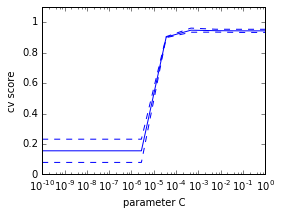

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets,svm

digits = datasets.load_digits()
X = digits.data
y = digits.target
svc = svm.SVC(kernel="linear")
#指定超参数C的取值范围
C_s = np.logspace(-10,0,10)
print C_s
print "参数列表长度",len(C_s)
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    #n_jobs代表计算机有几个线程就可以指定几个并行计算，this_scores是一个3维的数组 因为默认有3次交叉验证 每一折都会生成一个score
    this_scores = cross_val_score(svc,X,y,n_jobs=4)
    print this_scores
    scores.append(np.mean(this_scores))
    print scores
    scores_std.append(np.std(this_scores))
    print scores_std
#画图交叉验证曲线
import matplotlib.pyplot as plt
plt.figure(1,figsize=(4,3))
plt.clf()
plt.semilogx(C_s,scores)
plt.semilogx(C_s,np.array(scores)+np.array(scores_std),'b--')
plt.semilogx(C_s,np.array(scores)-np.array(scores_std),'b--')
locs,labels = plt.yticks()
# %g:格式化成浮点数字(根据值的大小采用%e(科学计数法)或%f)
plt.yticks(locs,list(map(lambda x:"%g" % x,locs)))
plt.ylabel('cv score')
plt.xlabel('parameter C')
plt.ylim(0,1.1)
plt.show()

In [7]:
print np.logspace(-9,1,10)
print np.linspace(0.1,1.0,5)

[  1.00000000e-09   1.29154967e-08   1.66810054e-07   2.15443469e-06
   2.78255940e-05   3.59381366e-04   4.64158883e-03   5.99484250e-02
   7.74263683e-01   1.00000000e+01]
[ 0.1    0.325  0.55   0.775  1.   ]


In [ ]:
from sklearn.model_selection import learning_curve